# Funciones de distribución de probabilidades

## Distribución Uniforme

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
a=10
b=80
n=80000
#uniform(from a to b, size)
data = np.random.uniform(a, b, n)

(array([8039., 8126., 7927., 7869., 8031., 8040., 7943., 7938., 7978.,
        8109.]),
 array([10.00021798, 17.00019004, 24.00016209, 31.00013414, 38.00010619,
        45.00007824, 52.00005029, 59.00002234, 65.99999439, 72.99996644,
        79.99993849]),
 <a list of 10 Patch objects>)

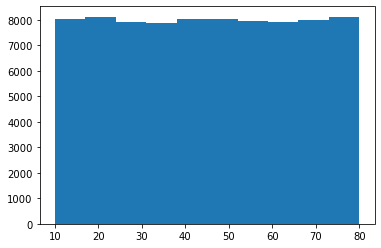

In [28]:
%matplotlib inline
plt.hist(data)

Conforme agregamos mas datos, la distribución toma una forma más rectangular entre a y b

## Distribución Normal ó Campana de Gauss

* La media es 0 por default.
* La desviación es 1 por default.
* La mayoría de los datos estará entre -1 y 1.

In [40]:
size=1000
data2 = np.random.randn(size)

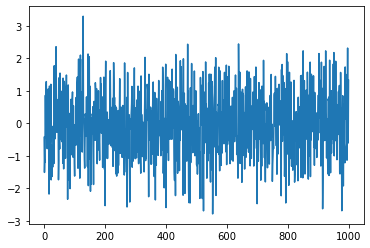

In [41]:
x= range(size)
plt.plot(x, data2)

(array([ 21.,  38., 123., 198., 234., 187., 129.,  57.,  12.,   1.]),
 array([-2.78791338, -2.17992515, -1.57193692, -0.96394869, -0.35596046,
         0.25202777,  0.860016  ,  1.46800424,  2.07599247,  2.6839807 ,
         3.29196893]),
 <a list of 10 Patch objects>)

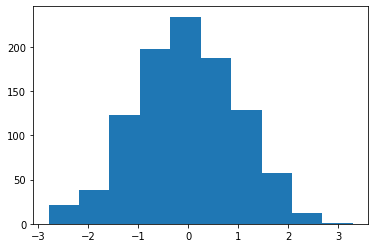

In [42]:
plt.hist(data2)

### Distribución gaussiana en curva

Función sigmoidal visible una vez que mostramos los datos ordenados.

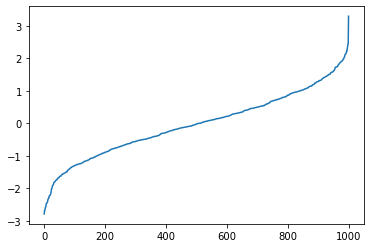

In [43]:
plt.plot(x, sorted(data2))

El crecimiento principal esta en -1 y 1.

### Definir la media y la desviación

(array([1.2000e+01, 2.7200e+02, 3.8950e+03, 1.9404e+04, 3.8068e+04,
        2.8809e+04, 8.4820e+03, 1.0060e+03, 4.9000e+01, 3.0000e+00]),
 array([-3.40804607, -0.87810847,  1.65182913,  4.18176674,  6.71170434,
         9.24164194, 11.77157954, 14.30151714, 16.83145475, 19.36139235,
        21.89132995]),
 <a list of 10 Patch objects>)

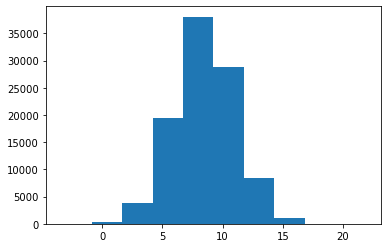

In [50]:
mu = 8.5
sd = 2.5
Z = np.random.randn(100000)
data3 = mu + sd * Z # Z =(X - mu) / sd -> N(0,1) 
plt.hist(data3)

In [52]:
data4 = np.random.randn(3, 5) #3 samples, size 5, each of them with Normal Dist.
data4

array([[ 1.26927561, -1.20163257, -1.10566059,  0.46782318,  1.02851736],
       [-0.72473099, -1.31930188,  1.03093367,  0.96201634,  1.16371073],
       [ 0.24688687, -0.64927347, -1.36738585, -0.23007463,  0.55348894]])

# Simulación de Monte Carlo

It tries to approach the value of $pi$ by getting the probability of 'throwing' something inside the circle.

![monte_carlo](Documents/monte_carlo.png)

For getting the simulation to run correctly you need to:

* Generate 2 random uniform numbers between 0 and 1, x and y, for n amount of 'throws' inside the square.

* Evaluate x^2 + y^2.

    * If that value < 1, we are inside the circle, otherwise we are outside.

* Evaluate the number of times inside the circle divided by the total number of tries to obtain an approximation of the probability to land inside the circle.

* Use that approximation to get a number really close to $ pi $.

* Repeat until getting a close enough approximation to $pi$.

* Calculate an average from all those experiments to get $pi$.


Estimated value of pi:  3.1414226666666694


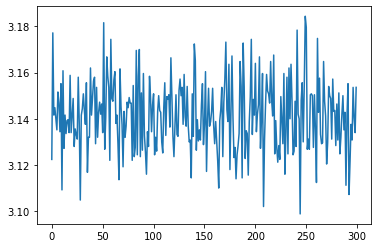

In [17]:
def Monte_Carlo(s,n):
    pi_avg=0
    pi_values=[]
    # s = number of experiments
    # n = number of throws
    for i in range(s):
        inside = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = x[j]**2 + y[j]**2
            if z <=1:
                inside+=1
        float_inside = float(inside)
        pi_value = (float_inside * 4) / n
        pi_values.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/s
    print('Estimated value of pi: ',pi)
    plt.plot(pi_values)

Monte_Carlo(300, 10000)

# Dummy Data Sets

In [23]:
n=100000
data = pd.DataFrame(
    {'A':np.random.randn(n),
     'B':1.5 + 2.5 * np.random.randn(n), 
     'C':np.random.uniform(5,20,n)}
)
data

,A,B,C
0,2.099099,-0.867871,5.563406
1,-1.258200,2.221062,14.795908
2,-1.059358,4.235888,6.981514
3,-0.474561,-0.426472,6.349605
4,0.420550,1.531943,15.415881
...,...,...,...
99995,0.057106,-1.139729,19.158868
99996,-1.689024,2.546793,9.929968
99997,-0.037147,0.371133,9.861503
99998,1.133491,0.229717,9.477123


DataFrame con columna 'A' con datos pseudoaleatorios con distribución normal estándar, columna 'B' lo mismo pero con media 1.5 y desviación estándar 2.5, y columna 'C' con distribución uniforme con rango entre 5 y 20, cada una con 'n' datos.

In [24]:
data.describe()

,A,B,C
count,100000.000000,100000.000000,100000.000000
mean,0.003980,1.500792,12.520105
std,0.999590,2.504278,4.329977
min,-4.739712,-8.986052,5.000077
25%,-0.670028,-0.195501,8.780014
50%,0.001351,1.506911,12.545202
75%,0.678873,3.184947,16.268740
max,4.486007,12.556863,19.999977


(array([10026.,  9843.,  9920.,  9899.,  9985., 10120., 10117.,  9952.,
        10086., 10052.]),
 array([ 5.0000765 ,  6.50006659,  8.00005668,  9.50004677, 11.00003687,
        12.50002696, 14.00001705, 15.50000714, 16.99999723, 18.49998732,
        19.99997741]),
 <a list of 10 Patch objects>)

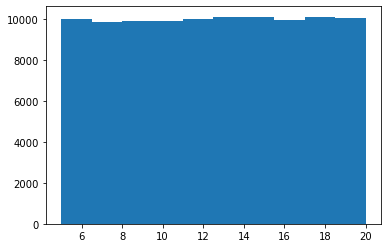

In [26]:
plt.hist(data['C']) #cumple con la teoría

In [36]:
#DataFrame con columna de Strings
datac = pd.read_csv('customer-churn-model/Customer Churn Model.txt')
columns = datac.columns.values
n2=len(columns)
data2 = pd.DataFrame(
{
    'A':np.random.randn(n2),
    'C':np.random.uniform(4,16,n2),
    'Column Names':columns
})
data2

,A,C,Column Names
0,-0.257422,8.005366,State
1,0.505154,13.547485,Account Length
2,1.048404,6.935076,Area Code
3,-0.073086,15.457223,Phone
4,0.000536,6.707825,Int'l Plan
5,-0.688023,13.589881,VMail Plan
6,-0.196479,5.532745,VMail Message
7,-0.322559,4.831907,Day Mins
8,-0.060323,6.759786,Day Calls
9,-0.053386,8.807968,Day Charge
